In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

random_seed = 777

# 設定
PCA_or_not = False
PCA_n = 5

In [32]:
df = pd.read_csv('dataset.csv')
df.head()

,song_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,label
0,1,-129.575760,122.92955,-22.193884,49.484856,-24.858639,33.370686,-13.389397,21.018896,-6.045021,...,1.320587,2.054224,-8.536629,8.460932,-5.219547,4.207222,-5.636729,5.987942,-1.939030,0
1,2,-131.593430,129.64317,-55.656467,49.287190,-16.282686,36.139780,0.741059,9.033503,0.837788,...,4.174528,14.427233,-0.645022,12.443151,-0.046594,3.284289,1.086975,4.504528,-0.723212,0
2,3,-183.298420,117.45908,-22.033175,24.566383,-31.206730,14.176015,-13.778350,1.269202,-3.213777,...,-7.469764,-5.896905,-8.906673,0.002047,-5.200934,-1.955609,-5.249220,2.472644,-1.365942,0
3,4,-95.231094,153.05118,-31.876870,46.072495,-15.342759,24.378073,-9.473240,8.595106,-1.803025,...,-0.164136,7.018112,-3.634860,5.738299,0.313524,6.666144,-0.732744,6.308126,-0.608489,0
4,5,-155.081760,109.98620,-17.222094,56.357445,-18.746206,35.473766,-13.958752,8.242919,-10.633527,...,-0.776032,5.664334,-6.793395,7.913438,-2.088957,4.183787,-3.599888,7.157237,-1.581926,0


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
features = df.drop(columns=["song_id", "label"])
labels = df["label"]

def plot(conf_matrix):
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.yticks(rotation=0)
    plt.ylabel('True Class')
    plt.show()

def plot_size(results):
    x_labels = [f"{size:.2f}" for size in results['test_size']]
    x = np.arange(len(x_labels))

    width = 0.2
    fig, ax = plt.subplots(figsize=(8, 4))

    ax.bar(x - width, results['precision'], width=width, label="Precision", color='royalblue')
    ax.bar(x, results['recall'], width=width, label="Recall", color='seagreen')
    ax.bar(x + width, results['f1-score'], width=width, label="F1-Score", color='tomato')
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, rotation=45, ha="right")
    ax.set_xlabel("Test Size")
    ax.set_ylabel("Score")
    ax.set_title("Effect of Test Size on Precision, Recall, and F1-Score")
    ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1)) 
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

In [35]:
if PCA_or_not:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    pca = PCA(n_components=PCA_n)
    features = pca.fit_transform(scaled_features)
    df = pd.DataFrame(data=features, columns=[f'PC{i+1}' for i in range(PCA_n)])

df.head()

,song_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,label
0,1,-129.575760,122.92955,-22.193884,49.484856,-24.858639,33.370686,-13.389397,21.018896,-6.045021,...,1.320587,2.054224,-8.536629,8.460932,-5.219547,4.207222,-5.636729,5.987942,-1.939030,0
1,2,-131.593430,129.64317,-55.656467,49.287190,-16.282686,36.139780,0.741059,9.033503,0.837788,...,4.174528,14.427233,-0.645022,12.443151,-0.046594,3.284289,1.086975,4.504528,-0.723212,0
2,3,-183.298420,117.45908,-22.033175,24.566383,-31.206730,14.176015,-13.778350,1.269202,-3.213777,...,-7.469764,-5.896905,-8.906673,0.002047,-5.200934,-1.955609,-5.249220,2.472644,-1.365942,0
3,4,-95.231094,153.05118,-31.876870,46.072495,-15.342759,24.378073,-9.473240,8.595106,-1.803025,...,-0.164136,7.018112,-3.634860,5.738299,0.313524,6.666144,-0.732744,6.308126,-0.608489,0
4,5,-155.081760,109.98620,-17.222094,56.357445,-18.746206,35.473766,-13.958752,8.242919,-10.633527,...,-0.776032,5.664334,-6.793395,7.913438,-2.088957,4.183787,-3.599888,7.157237,-1.581926,0


Cross-validated accuracy: 0.7529999999999999

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        64
           1       0.69      0.88      0.77        60
           2       0.79      0.69      0.73        70
           3       0.78      0.77      0.77        56

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



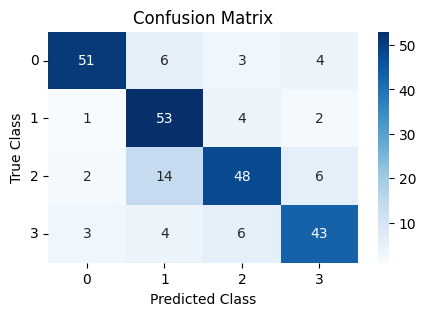

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=random_seed)
clf = RandomForestClassifier(n_estimators=120, random_state=random_seed)

cv_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {np.mean(cv_accuracy)}')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'\n{classification_report(y_test, y_pred)}')

conf_matrix = confusion_matrix(y_test, y_pred)
plot(conf_matrix)

Cross-validated accuracy: 0.74700

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        64
           1       0.69      0.82      0.75        60
           2       0.78      0.67      0.72        70
           3       0.72      0.73      0.73        56

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



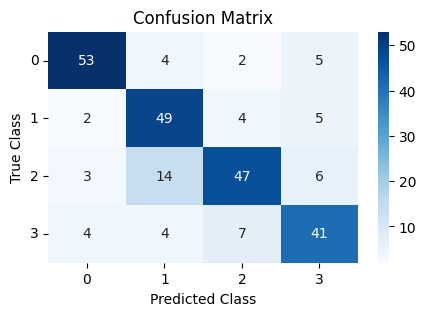

In [37]:
clf_weighted = RandomForestClassifier(n_estimators=120, class_weight="balanced", random_state=random_seed)

cv_accuracy = cross_val_score(clf_weighted, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {np.mean(cv_accuracy):.5f}')

clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)

print(f'\n{classification_report(y_test, y_pred_weighted)}')

conf_matrix = confusion_matrix(y_test, y_pred_weighted)
plot(conf_matrix)

Test size 0.10, Cross-validated accuracy: 0.74667
Test size 0.15, Cross-validated accuracy: 0.74007
Test size 0.20, Cross-validated accuracy: 0.75274
Test size 0.25, Cross-validated accuracy: 0.73957
Test size 0.30, Cross-validated accuracy: 0.74259
Test size 0.35, Cross-validated accuracy: 0.74263
Test size 0.40, Cross-validated accuracy: 0.74899


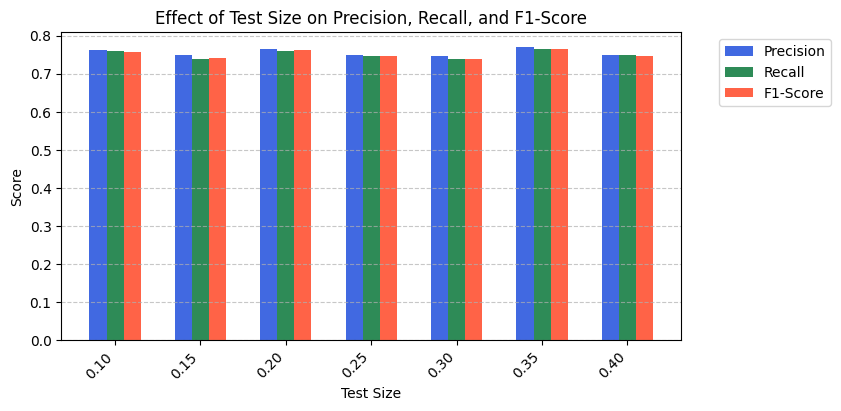

In [38]:
test_sizes = np.arange(0.1, 0.45, 0.05)
results = {'precision': [], 'recall': [], 'f1-score': [], 'test_size': []}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_seed)
    
    clf = RandomForestClassifier(n_estimators=120, random_state=random_seed)
    cv_accuracy = cross_val_score(clf_weighted, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Test size {test_size:.2f}, Cross-validated accuracy: {np.mean(cv_accuracy):.5f}') 
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results['test_size'].append(test_size)
    results['precision'].append(report['weighted avg']['precision'])
    results['recall'].append(report['weighted avg']['recall'])
    results['f1-score'].append(report['weighted avg']['f1-score'])

plot_size(results)

Cross-validated accuracy: 0.61200

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        64
           1       0.53      0.67      0.59        60
           2       0.61      0.53      0.56        70
           3       0.49      0.48      0.49        56

    accuracy                           0.57       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.57      0.57      0.57       250



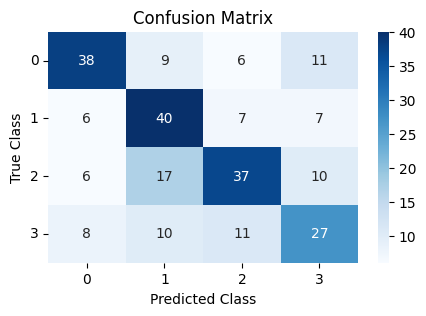

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=random_seed)
clf = DecisionTreeClassifier(max_depth=10, random_state=random_seed)

cv_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {np.mean(cv_accuracy):.5f}')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'\n{classification_report(y_test, y_pred)}')

conf_matrix = confusion_matrix(y_test, y_pred)
plot(conf_matrix)

Cross-validated accuracy: 0.62200

              precision    recall  f1-score   support

           0       0.64      0.69      0.66        64
           1       0.59      0.60      0.60        60
           2       0.60      0.51      0.55        70
           3       0.47      0.50      0.48        56

    accuracy                           0.58       250
   macro avg       0.57      0.58      0.57       250
weighted avg       0.58      0.58      0.58       250



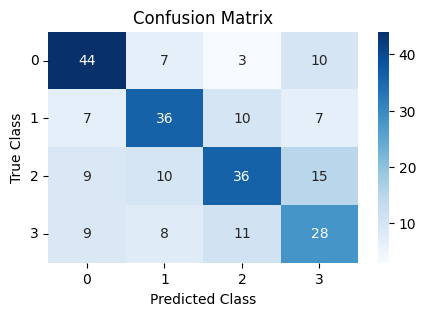

In [40]:
clf_weighted = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=random_seed)

cv_accuracy = cross_val_score(clf_weighted, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {np.mean(cv_accuracy):.5f}')

clf_weighted.fit(X_train, y_train)
y_pred_weighted = clf_weighted.predict(X_test)

print(f'\n{classification_report(y_test, y_pred_weighted)}')

conf_matrix = confusion_matrix(y_test, y_pred_weighted)
plot(conf_matrix)

Test size 0.10, Cross-validated accuracy: 0.58489
Test size 0.15, Cross-validated accuracy: 0.58667
Test size 0.20, Cross-validated accuracy: 0.59358
Test size 0.25, Cross-validated accuracy: 0.61256
Test size 0.30, Cross-validated accuracy: 0.60985
Test size 0.35, Cross-validated accuracy: 0.60476
Test size 0.40, Cross-validated accuracy: 0.59813


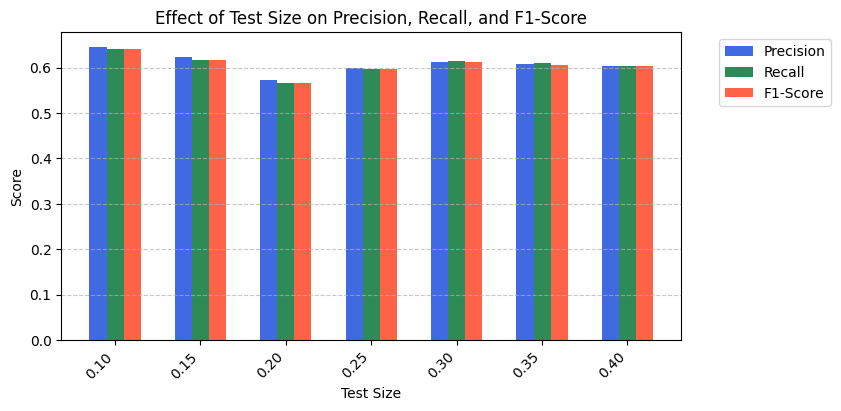

In [41]:
test_sizes = np.arange(0.1, 0.45, 0.05)
results = {'precision': [], 'recall': [], 'f1-score': [], 'test_size': []}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_seed)
    
    clf = DecisionTreeClassifier(max_depth=10, random_state=random_seed)
    cv_accuracy = cross_val_score(clf_weighted, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Test size {test_size:.2f}, Cross-validated accuracy: {np.mean(cv_accuracy):.5f}') 
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results['test_size'].append(test_size)
    results['precision'].append(report['weighted avg']['precision'])
    results['recall'].append(report['weighted avg']['recall'])
    results['f1-score'].append(report['weighted avg']['f1-score'])

plot_size(results)

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

In [68]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

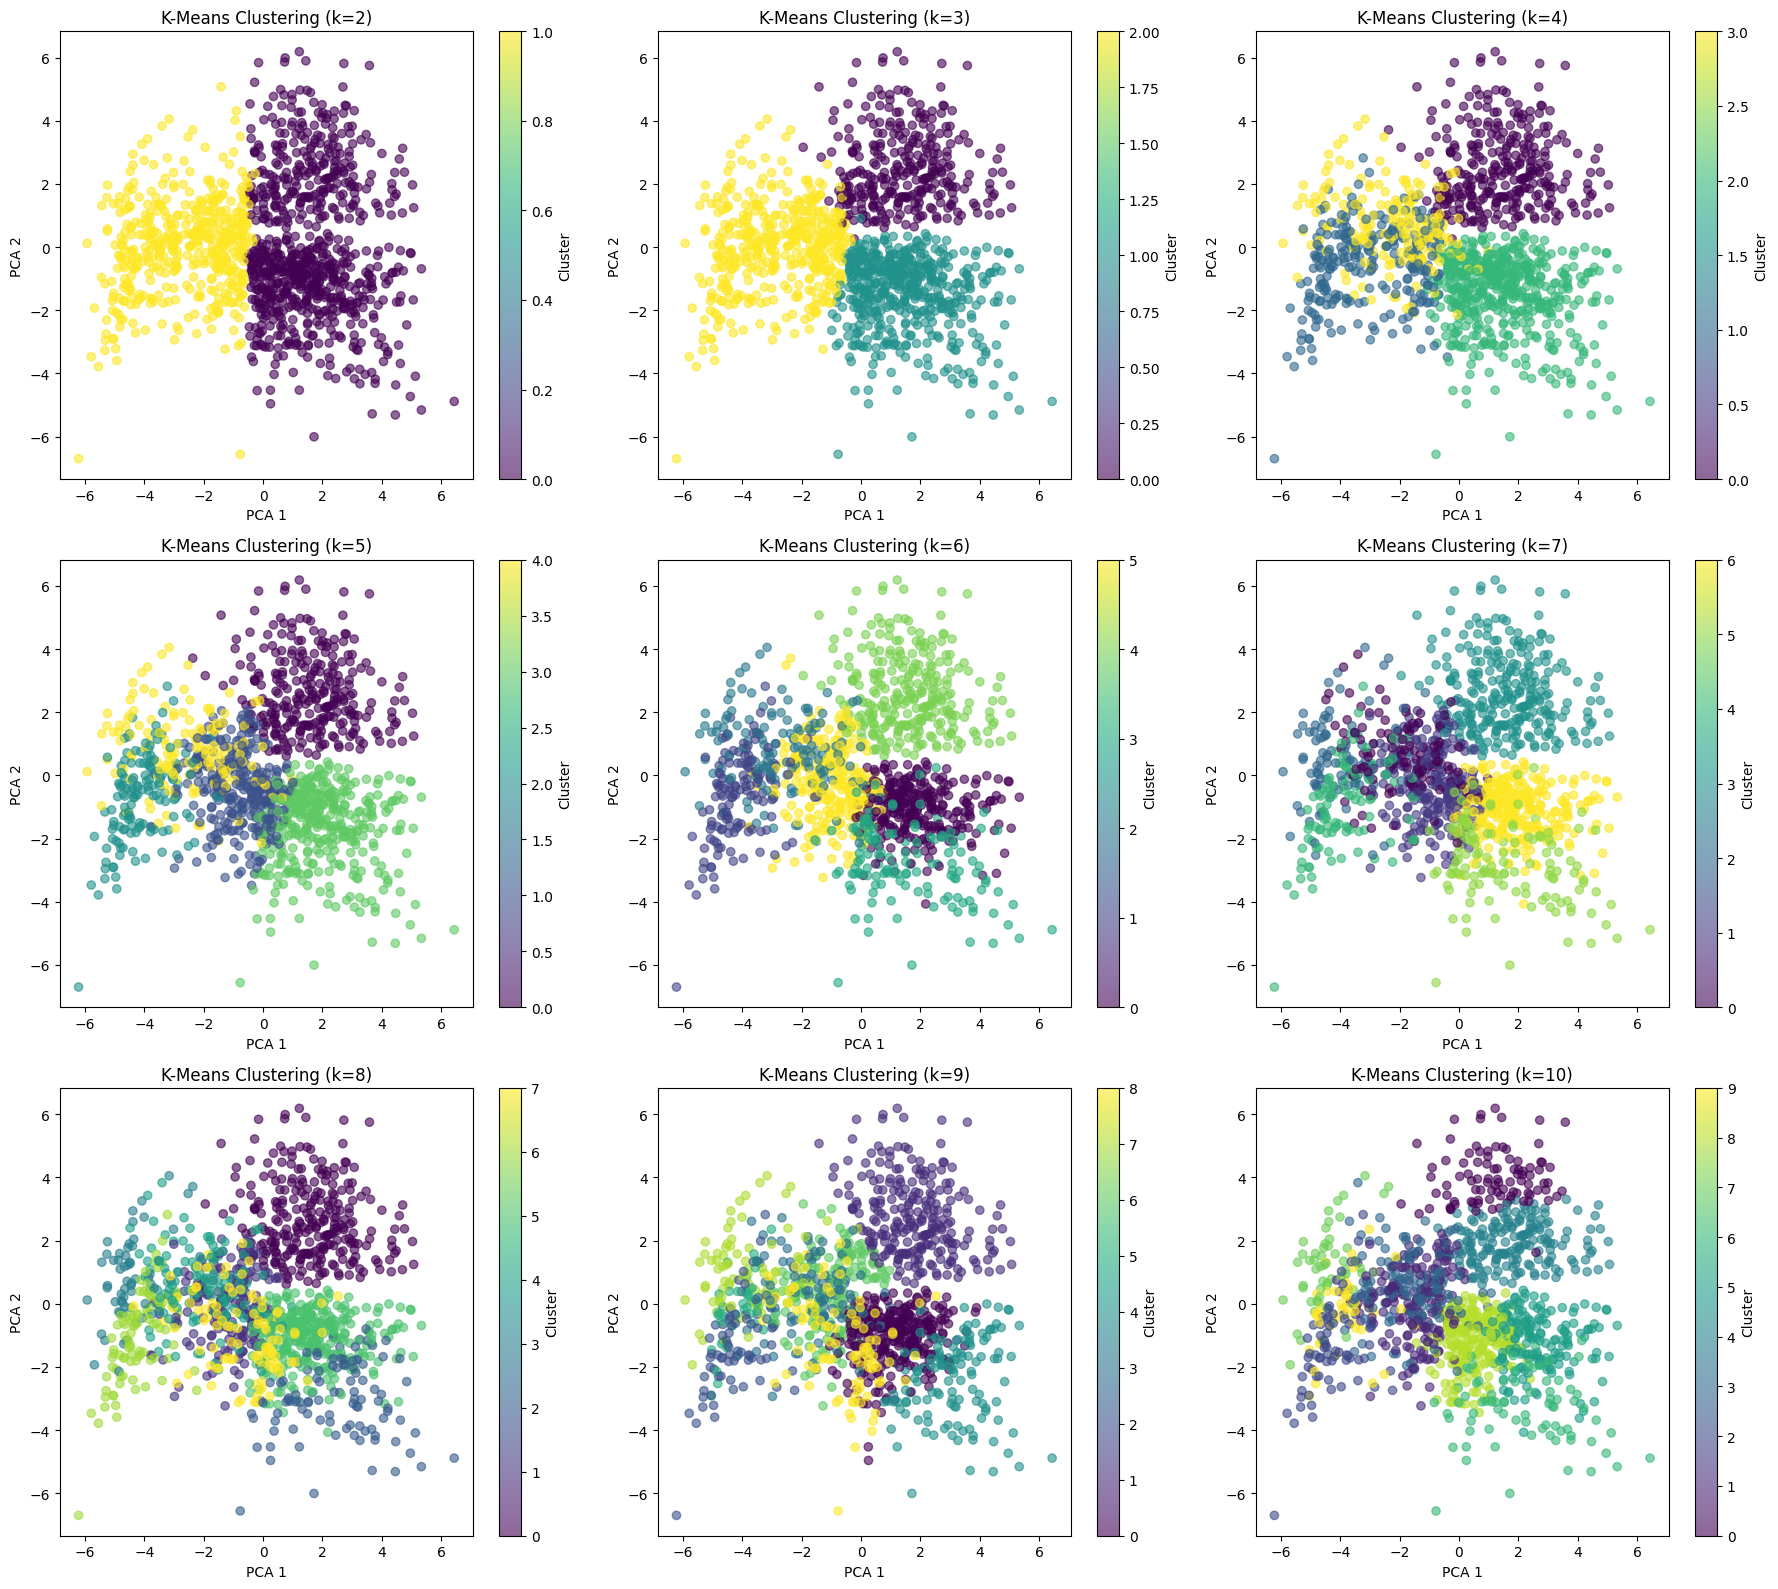

In [79]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

ari_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    df["cluster"] = clusters
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    scatter = axes[k-2].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
    axes[k-2].set_title(f"K-Means Clustering (k={k})")
    axes[k-2].set_xlabel("PCA 1")
    axes[k-2].set_ylabel("PCA 2")
    
    fig.colorbar(scatter, ax=axes[k-2], label="Cluster")
    
    ari = adjusted_rand_score(df["label"], clusters)
    ari_scores.append(ari)

plt.tight_layout()
plt.show()

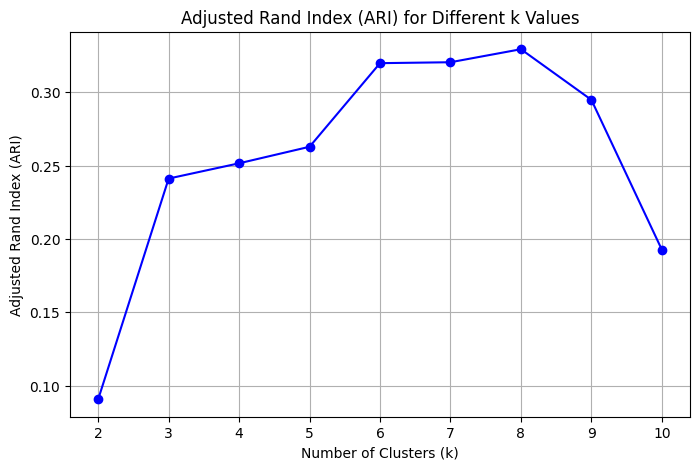

In [77]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), ari_scores, marker='o', linestyle='-', color='b')
plt.title("Adjusted Rand Index (ARI) for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(True)
plt.show()